In [1]:
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
# initial set of names
names = ['Patrick', 'Bob', 'Charlie', 'Catdog', 'Tony']
# to make a list of 1,000 names using the 5 above, we need to generate a random # between 0 and 4

random.seed(500)
random_names = [names[random.randint(low=0,high=len(names))] for i in range(1000)]

# seed(500)- creates seed
# randint(low=0, high=len(names))] generates random into between zero and length of list "names"
# names[n] select the name where its index is equal to n
# for i in range(n) loop until i is equal to n


# Print first 10 records
random_names[:10]

['Charlie',
 'Bob',
 'Bob',
 'Patrick',
 'Bob',
 'Bob',
 'Bob',
 'Charlie',
 'Charlie',
 'Charlie']

In [3]:


# The number of births per name for the year 1880
births = [random.randint(low=0,high=1000) for i in range(1000)]
births[:10]



[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

In [4]:
# The zip function merges the names and births data set 

BabyDataSet = list(zip(random_names,births))
BabyDataSet[:10]

[('Charlie', 968),
 ('Bob', 155),
 ('Bob', 77),
 ('Patrick', 578),
 ('Bob', 973),
 ('Bob', 124),
 ('Bob', 155),
 ('Charlie', 403),
 ('Charlie', 199),
 ('Charlie', 191)]

In [5]:
# df is a DataFrame object. holds data in a similar way as a csv

df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df[:10]



,Names,Births
0,Charlie,968
1,Bob,155
2,Bob,77
3,Patrick,578
4,Bob,973
5,Bob,124
6,Bob,155
7,Charlie,403
8,Charlie,199
9,Charlie,191


In [6]:


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Names     1000 non-null object
Births    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [7]:
df.to_csv('birth.csv',index=False,header=False)

In [8]:
Location = r'birth.csv'
df = pd.read_csv(Location)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
Charlie    999 non-null object
968        999 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [11]:
# df.head shows the first 5 records of df. pass along a number to see more or less
df.head(10)

,Charlie,968
0,Bob,155
1,Bob,77
2,Patrick,578
3,Bob,973
4,Bob,124
5,Bob,155
6,Charlie,403
7,Charlie,199
8,Charlie,191
9,Catdog,769


In [12]:
# removes the first row of the data as header 
df = pd.read_csv(Location, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
0    1000 non-null object
1    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [13]:
df.tail()


,0,1
995,Catdog,151
996,Bob,511
997,Catdog,756
998,Bob,294
999,Catdog,152


In [14]:

df = pd.read_csv(Location, names=['Names','Births'])
df.head(5)


,Names,Births
0,Charlie,968
1,Bob,155
2,Bob,77
3,Patrick,578
4,Bob,973


In [15]:
df['Names'].unique()

# lists the unique values in Names

array(['Charlie', 'Bob', 'Patrick', 'Catdog', 'Tony'], dtype=object)

In [17]:
print(df['Names'].describe())

# another way to find unqiue values in names

count        1000
unique          5
top       Patrick
freq          206
Name: Names, dtype: object


In [18]:

# The groupby function sums the values by the names 

# Create a groupby object
name = df.groupby('Names')

# Apply the sum function to the groupby object
df = name.sum()
df


,Births
Names,
Bob,97826
Catdog,90705
Charlie,99438
Patrick,106817
Tony,102319


In [ ]:
# To find the most popular name with the highest birth rate, we can do one of the following 

In [19]:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Births
Names,
Patrick,106817


In [20]:
df['Births'].max()

106817

The most popular name


,Births
Names,
Patrick,106817
Tony,102319
Charlie,99438
Bob,97826
Catdog,90705


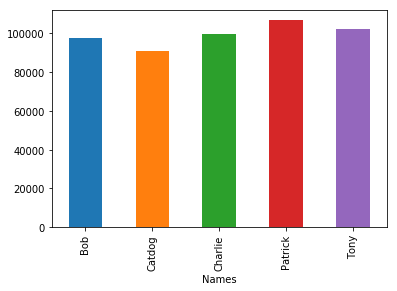

In [21]:


# Create graph
df['Births'].plot.bar()

print("The most popular name")
df.sort_values(by='Births', ascending=False)

